In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.simplefilter('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline


In [2]:
data = pd.read_csv('../Data/attacks_analys.csv', sep=',', encoding='latin1')

In [3]:
# Me creo un nuevo data con las columnas que me interesan

df = data[["year", "type", "country", "area", "activity", "sex_", "age", "injury", "fatal_y_n"]]


In [4]:
# Checkeo las filas en las que el año o la edad son igual a 0 (valores nulos para mi) y me las elimino

bad_index = df[(df.year==0) | (df.age==0)].index

df.drop(index=bad_index, inplace=True)


In [5]:
# Saco un resumen de los datos numericos

fig = df.describe().T
fig



,count,mean,std,min,25%,50%,75%,max
year,3350.0,1984.584179,31.731507,1703.0,1965.0,1996.0,2009.0,2018.0
age,3350.0,27.362090,13.897545,1.0,17.0,24.0,35.0,87.0


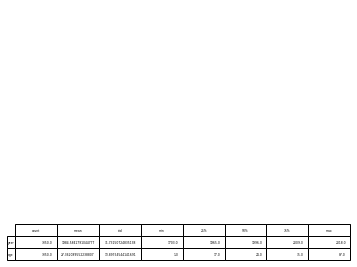

In [6]:
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, fig)  # where df is your data frame

plt.savefig('../images/describe.png')

In [7]:
# Hago una agrupación para ver diferente medidas en función del pais

pais = df.groupby("country").agg({"age": ["count", "mean", "median", "std"]}).sort_values(("age","count"), ascending=False).head(10)
pais


age                             
                 count       mean median        std
country                                            
USA               1462  26.753078   22.0  14.595243
AUSTRALIA          697  27.916786   24.0  13.598997
SOUTH AFRICA       362  25.616022   23.0  10.794174
BAHAMAS             67  36.626866   36.0  14.744116
BRAZIL              64  24.015625   21.0  10.071951
NEW ZEALAND         48  27.604167   23.5  15.479210
PAPUA NEW GUINEA    44  20.727273   19.0   9.081962
MEXICO              41  31.780488   32.0  11.816328
REUNION             35  29.200000   27.0  11.192960
FIJI                29  28.655172   28.0  12.175138

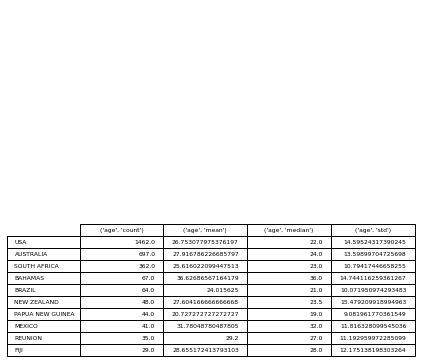

In [8]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, pais)  # where df is your data frame

plt.savefig('../images/pais.png')

In [9]:
# Hago una pivot table para ver diferente medidas en función del pais y del sexo

df.pivot_table(aggfunc=['count', 'mean'], index=['country'], columns=['sex_'], values=['age'], margins=True ).sort_values(("count", "age", "All"), ascending=False).head(4)

count                             mean                        \
                age                              age                         
sex_         Female    Male unknown   All     Female       Male    unknown   
country                                                                      
All           441.0  2876.0    33.0  3350  26.900227  27.473922  23.787879   
USA           268.0  1183.0    11.0  1462  26.100746  26.967878  19.545455   
AUSTRALIA      58.0   632.0     7.0   697  27.603448  27.988924  24.000000   
SOUTH AFRICA   14.0   348.0     NaN   362  23.357143  25.706897        NaN   

                         
                         
sex_                All  
country                  
All           27.362090  
USA           26.753078  
AUSTRALIA     27.916786  
SOUTH AFRICA  25.616022

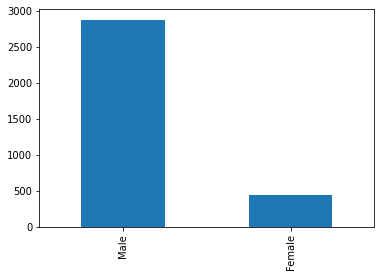

In [17]:
df.sex_[df.sex_!= "unknown"].value_counts().plot.bar();

In [19]:
# Hago una pivot table para ver diferente medidas en función del pais y mortalidad

df.pivot_table(aggfunc=['count', 'mean'], index=['country'], columns=['fatal_y_n'], values=['age'], margins=True ).sort_values(("count", "age", "All"), ascending=False).head(4)

count                            mean                        \
                 age                             age                         
fatal_y_n          N UNKNOWN      Y   All          N    UNKNOWN          Y   
country                                                                      
All           2535.0   227.0  588.0  3350  27.272584  29.066079  27.090136   
USA           1293.0    90.0   79.0  1462  26.430008  28.755556  29.759494   
AUSTRALIA      468.0    53.0  176.0   697  27.888889  29.792453  27.426136   
SOUTH AFRICA   264.0    25.0   73.0   362  25.473485  27.400000  25.520548   

                         
                         
fatal_y_n           All  
country                  
All           27.362090  
USA           26.753078  
AUSTRALIA     27.916786  
SOUTH AFRICA  25.616022

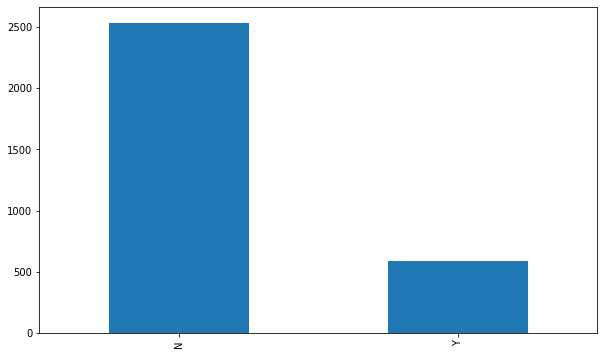

In [18]:
plt.figure(figsize=(10, 6))
df.fatal_y_n[df.fatal_y_n != "UNKNOWN"].value_counts().plot.bar();
